In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
cd /gdrive/My\ Drive/

/gdrive/My Drive


In [0]:
import pandas as pd
import numpy as np
import pylab as plt
import pandas as pd
from glob import glob
from astropy.io import fits
from astropy.table import Table
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten , BatchNormalization , ReLU
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as K

In [0]:
def conf_plotter(y_true, y_pred, classes,
                      normalize=0,
                      title=None,
                      cmap=plt.cm.pink_r,
                      mode = 'train',
                      save = 0,
                      name = 'conf.jpg'):

    if not title:
        if mode == 'train':
            title = 'Normalized confusion matrix on train dataset'
        else:
            title = 'Normalized confusion matrix on test dataset'
            

    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax ,fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           xlabel='Predicted label',
           ylabel='True label')
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
                    
        item.set_fontsize(20)
     
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        
        item.set_fontsize(12)

        
                
    plt.gca().invert_yaxis()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if save == 1:
        plt.savefig(name)
    return ax

In [0]:
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_test= pd.read_csv('./data/y_test.csv')

In [0]:
X_train, x_val = train_test_split(X_train, test_size=0.2, random_state = 5)

In [0]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4708, 369), (1962, 369), (5886, 2), (1962, 2))

In [0]:
y_train = y_train.drop(columns =['Unnamed: 0'] )
y_test  = y_test.drop(columns =['Unnamed: 0'] )
X_train = X_train.drop(columns =['Unnamed: 0'] )
X_test = X_test.drop(columns =['Unnamed: 0'] )

In [0]:
y_train.head()

ImportError: ignored

   target
0      95
1      15
2      42
3      65
4      90

In [0]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

X_train = standardscaler.fit_transform(X_train)

X_test = standardscaler.fit_transform(X_test)

X_train.shape , X_test.shape

((4708, 368), (1962, 368))

In [0]:
from sklearn.preprocessing import OneHotEncoder

y_train = OneHotEncoder(categories='auto').fit_transform(y_train[['target']]).toarray()

y_test  = OneHotEncoder(categories='auto').fit_transform(y_test[['target']]).toarray()

y_train.shape , y_test.shape

((5886, 14), (1962, 14))

In [0]:
input_dim = X_train.shape[1]

# n_class = len(df['target'].unique())
n_class = 14
input_dim

368

In [0]:
af = None

K.backend.clear_session()

model = Sequential()

model.add(Dense(input_dim, input_dim=input_dim))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))

model.add(Dense(256))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))


model.add(Dense(128))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))

model.add(Dense(64))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))

model.add(Dense(32))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))


model.add(Dense(n_class, activation='softmax'))

In [0]:
summ =model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 368)               135792    
_________________________________________________________________
batch_normalization_1 (Batch (None, 368)               1472      
_________________________________________________________________
activation_1 (Activation)    (None, 368)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 368)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               94464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
__________

In [0]:
# x_in = tf.placeholder(tf.float32,[None,input_dim])    
# learning_rate = tf.placeholder(tf.float32)
# drop_out = tf.placeholder(tf.float32)
# y_true = tf.placeholder(tf.float32,[None , n_class])

In [0]:

# x = tf.layers.dense(x_in , input_dim)
# print(x)
# x = tf.layers.batch_normalization(x)
# print(x)
# x = tf.nn.selu(x)
# print(x)
# x = tf.nn.dropout( x, rate=drop_out)
# print(x)


# x = tf.layers.dense(x, 256)
# print(x)
# x = tf.layers.batch_normalization(x)
# print(x)
# x = tf.nn.selu(x)
# print(x)
# x = tf.nn.dropout( x, rate=drop_out)
# print(x)


# x = tf.layers.dense(x, 128)
# print(x)
# x = tf.layers.batch_normalization(x)
# print(x)
# x = tf.nn.selu(x)
# print(x)
# x = tf.nn.dropout( x, rate=drop_out)
# print(x)

# x = tf.layers.dense(x, 64)
# print(x)
# x = tf.layers.batch_normalization(x)
# print(x)
# x = tf.nn.selu(x)
# print(x)
# x = tf.nn.dropout( x, rate=drop_out)
# print(x)

# x = tf.layers.dense(x, 32)
# print(x)
# x = tf.layers.batch_normalization(x)
# print(x)
# x = tf.nn.selu(x)
# print(x)
# x = tf.nn.dropout( x, rate=drop_out)
# print(x)


# x_out = tf.layers.dense(x, n_class, activation=tf.nn.softmax)
# print(x_out)

# print("\033[91m ============================ END ============================= \033[0m")


In [0]:
def multi_weighted_logloss(y_true, y_preds):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    
    
    y_p = y_preds
    y_ohe = y_true
    
    #y_ohe = pd.get_dummies(y_true)
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = tf.clip_by_value(t=y_p, clip_value_min= 1e-15, clip_value_max=1-1e-15)
    # Transform to log
    y_p_log = tf.log(y_p)

    y_log_ones = tf.reduce_sum(tf.math.multiply(y_ohe , y_p_log), axis=0)

    # Get the number of positives for each class
    nb_pos = tf.reduce_sum( y_ohe ,axis=0)

    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    class_arr = tf.cast(class_arr, tf.float32)

    y_w = y_log_ones * class_arr / nb_pos

    
    loss = - tf.divide(tf.reduce_sum(y_w) , (tf.reduce_sum(class_arr)+1e-30))

    return loss

In [0]:
def customLoss(yTrue,yPred):
    return multi_weighted_logloss(yTrue,yPred)

adam = K.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-3, amsgrad=False)

In [0]:
model.compile(loss = tf.losses.log_loss , optimizer=adam , )

W0819 18:17:34.932313 140470256220032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
# sess = tf.Session()
# K.backend.set_session(sess)
# sess.as_default()
# sess.graph.as_default()

In [0]:
model.fit(X_train,y_train, validation_split =1 ,validation_data= (x_val , y_val) , epochs=10,batch_size=200,verbose=1)

W0819 18:17:37.752743 140470256220032 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
5886/5886 [==============================] - 6s 981us/step - loss: nan
Epoch 2/10
5886/5886 [==============================] - 1s 89us/step - loss: nan
Epoch 3/10
5886/5886 [==============================] - 1s 87us/step - loss: nan
Epoch 4/10
5886/5886 [==============================] - 0s 84us/step - loss: nan
Epoch 5/10
5886/5886 [==============================] - 1s 92us/step - loss: nan
Epoch 6/10
5886/5886 [==============================] - 1s 88us/step - loss: nan
Epoch 7/10
5886/5886 [==============================] - 1s 90us/step - loss: nan
Epoch 8/10
5886/5886 [==============================] - 1s 85us/step - loss: nan
Epoch 9/10
5886/5886 [==============================] - 1s 87us/step - loss: nan
Epoch 10/10
5886/5886 [==============================] - 1s 86us/step - loss: nan


In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=300,verbose=0)

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=300,verbose=0)

In [0]:
# evaluate the model
model.evaluate(X_test, y_test)

1962/1962 [==============================] - 0s 223us/step


0.07014495053847875

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=300,verbose=0)

In [0]:
# evaluate the model
model.evaluate(X_test, y_test, verbose=1)

1962/1962 [==============================] - 0s 122us/step


0.05537313951234448

In [0]:
model.evaluate(X_train, y_train, verbose=1)

5886/5886 [==============================] - 1s 106us/step


0.04059130342115847

In [0]:
loaded_model.fit(X_train,y_train,epochs=10,batch_size=300,verbose=0)

NameError: ignored

In [0]:
path = './NN_models/6'
# serialize model to JSON
model_json = model.to_json()
with open(str(path)+'/NN6_model.json', "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights(str(path)+'/NN6_model.h5')
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import model_from_json

# load json and create model
json_file = open('./NN_models/5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./NN_models/5/model.h5")
print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

W0818 09:56:13.573389 140153045301120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3217: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Loaded model from disk


In [0]:
predicts = model.predict(X_test)

y_preds = pd.DataFrame(predicts)
y_true = pd.DataFrame(y_test)


def multi_weighted_logloss(y_true, y_preds):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    
    
    y_p = y_preds
    y_ohe = y_true
    
    #y_ohe = pd.get_dummies(y_true)
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1-1e-15)
    # Transform to log
    y_p_log = np.log(y_p)

    
    y_log_ones = np.sum(y_ohe.values * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_ohe.sum(axis=0).values.astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos
    
    loss = - np.sum(y_w) / np.sum(class_arr)
    return loss



multi_weighted_logloss(y_true, y_preds)

0.7028440846225158

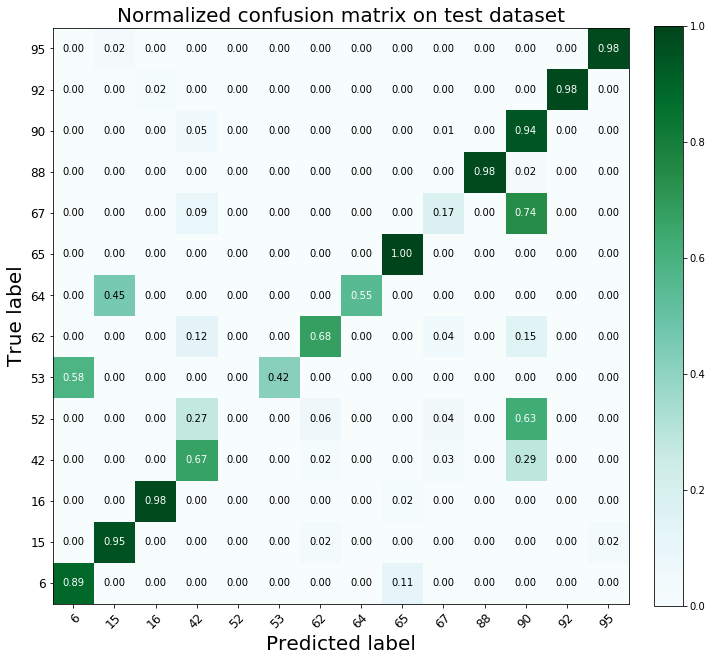

In [0]:
pred = np.array(predicts)
y_t = np.array(y_test)

Y = []
pr= []

for i in range(len(y_test)):
    
    pr.append(np.argmax(pred[i]))
    
    Y.append(np.argmax((y_t[i])))

classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]

labels = [classes[i] for i in range(len(classes))]
conf_plotter(Y , pr , labels , normalize=1, mode='test' , cmap = plt.cm.BuGn, save=1 , name='NN.jpg')

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y, pr)
np.trace(cm)/len(y_test)

0.8496432212028542

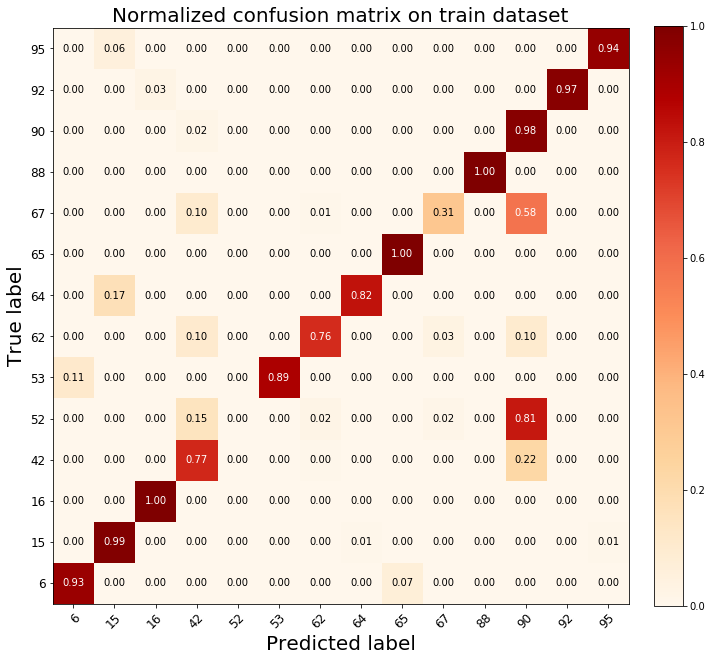

In [0]:
predicts = model.predict(X_train)

Y = []
pr= []

for i in range(len(y_train)):
    
    pr.append(np.argmax((np.array(predicts)[i])))
    Y.append(np.argmax(np.array(y_train)[i]))


    
conf_plotter(Y , pr , labels , normalize=1, cmap = plt.cm.OrRd, save=1 , name='train_3.jpg')